In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = Path("..") / "data"
resale_price = pd.read_csv(data_dir / "resale_price_train.csv")
resale_price["month"] = pd.to_datetime(resale_price["month"])
median_income = pd.read_csv(data_dir / "median_income_data_train.csv")
median_income["year"] = pd.to_datetime(median_income["year"], format="%Y")

In [3]:
resale_price.info()
resale_price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   town            7023 non-null   object        
 1   month           7023 non-null   datetime64[ns]
 2   resale_price    7023 non-null   float64       
 3   price_diff      7023 non-null   float64       
 4   price_log       7023 non-null   float64       
 5   price_log_diff  7023 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 329.3+ KB


,town,month,resale_price,price_diff,price_log,price_log_diff
0,ANG MO KIO,2000-02-01,218060.0,-8548.0,12.292526,-0.038451
1,ANG MO KIO,2000-03-01,225270.0,7210.0,12.325055,0.032529
2,ANG MO KIO,2000-04-01,225847.0,577.0,12.327613,0.002558
3,ANG MO KIO,2000-05-01,217008.0,-8839.0,12.287689,-0.039924
4,ANG MO KIO,2000-06-01,206930.0,-10078.0,12.240136,-0.047554


In [4]:
resale_price.describe()

,month,resale_price,price_diff,price_log,price_log_diff
count,7023,7023.000000,7023.000000,7023.000000,7023.000000
mean,2011-08-29 15:37:39.034600704,387677.447957,1149.821871,12.809929,0.002897
min,2000-02-01 00:00:00,134500.000000,-410000.000000,11.809319,-0.791128
25%,2006-02-01 00:00:00,265945.500000,-10404.500000,12.491047,-0.030032
50%,2011-09-01 00:00:00,394636.000000,1170.000000,12.885719,0.003392
75%,2017-05-01 00:00:00,472065.500000,12963.500000,13.064873,0.036622
max,2022-12-01 00:00:00,956760.000000,394333.000000,13.771308,0.631904
std,NaN,129813.382960,37009.741091,0.346025,0.076793


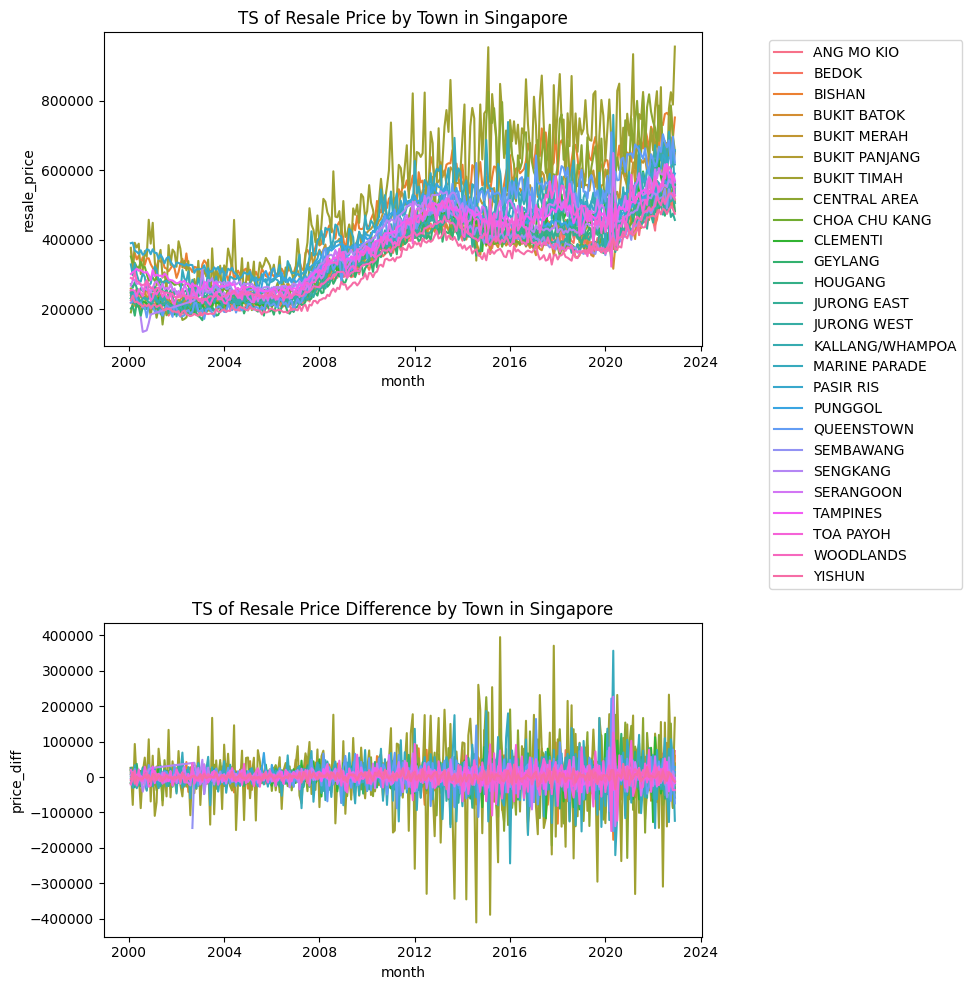

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.lineplot(data=resale_price, x="month", y="resale_price", hue="town", ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(1.1, 0.1))
axes[0].set_title("TS of Resale Price by Town in Singapore")

sns.lineplot(data=resale_price, x="month", y="price_diff", hue="town", ax=axes[1])
# remove legend
axes[1].legend_.remove()
axes[1].set_title("TS of Resale Price Difference by Town in Singapore")

plt.tight_layout()
plt.savefig(Path("..") / "asset" / "resale_price_ts.png")

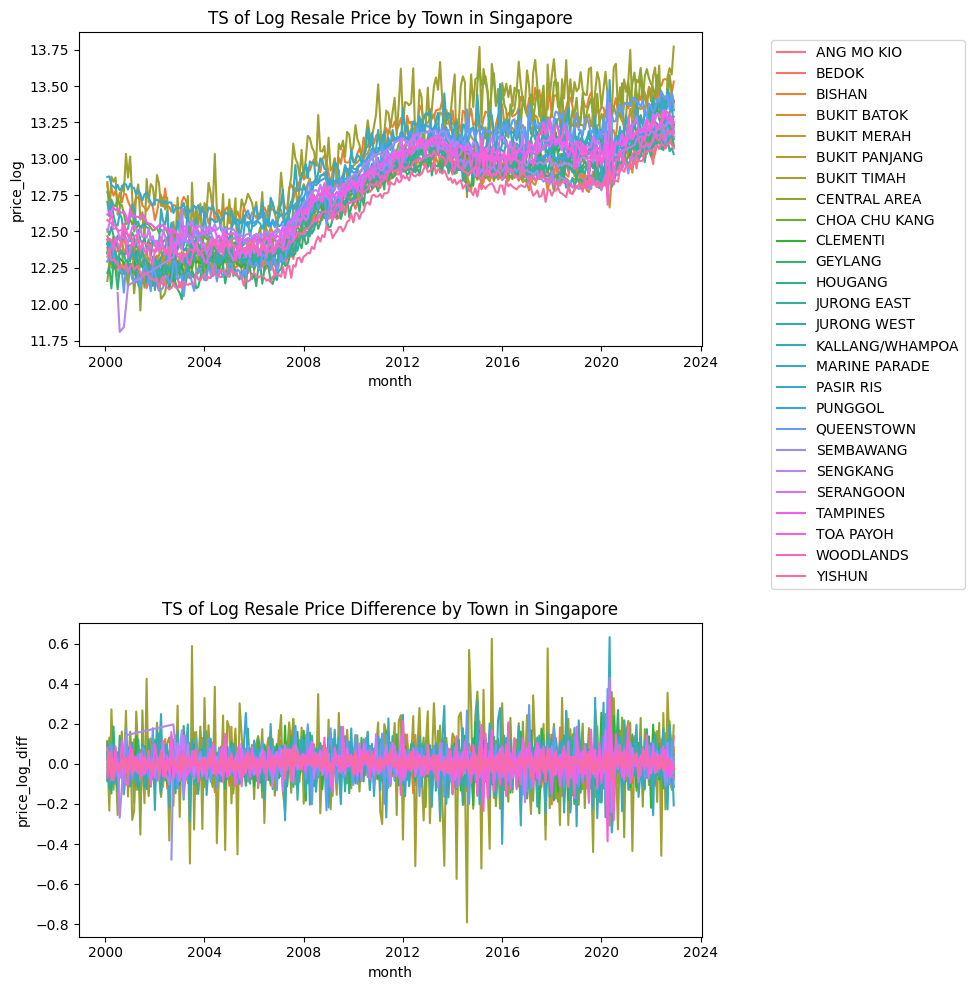

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.lineplot(data=resale_price, x="month", y="price_log", hue="town", ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(1.1, 0.1))
axes[0].set_title("TS of Log Resale Price by Town in Singapore")

sns.lineplot(data=resale_price, x="month", y="price_log_diff", hue="town", ax=axes[1])
# remove legend
axes[1].legend_.remove()
axes[1].set_title("TS of Log Resale Price Difference by Town in Singapore")

plt.tight_layout()
plt.savefig(Path("..") / "asset" / "resale_price_log_ts.png")

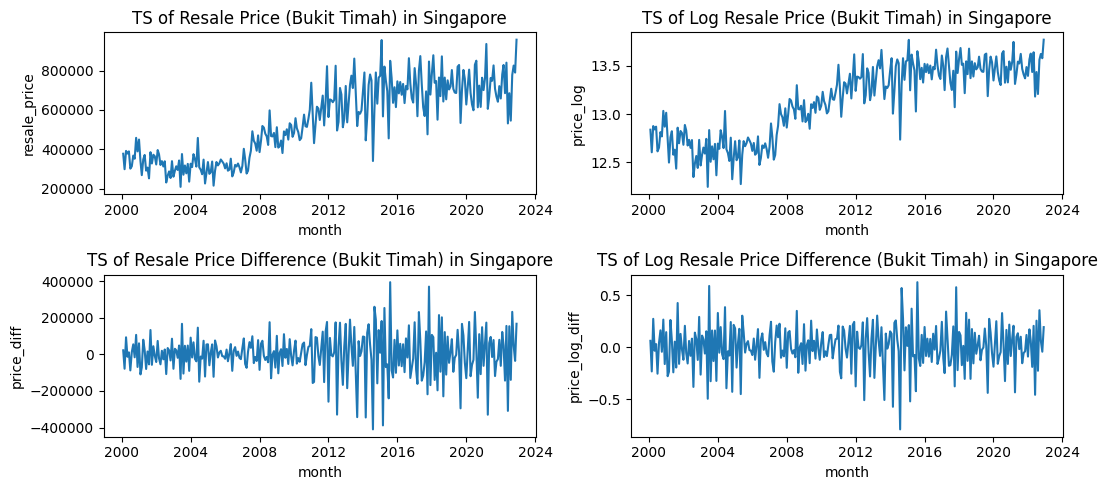

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(11, 5))
sns.lineplot(data=resale_price.query("town == 'BUKIT TIMAH'"), x="month", y="resale_price", hue="town", ax=axes[0][0])
axes[0][0].legend_.remove()
axes[0][0].set_title("TS of Resale Price (Bukit Timah) in Singapore")

sns.lineplot(data=resale_price.query("town == 'BUKIT TIMAH'"), x="month", y="price_log", hue="town", ax=axes[0][1])
axes[0][1].legend_.remove()
axes[0][1].set_title("TS of Log Resale Price (Bukit Timah) in Singapore")

sns.lineplot(data=resale_price.query("town == 'BUKIT TIMAH'"), x="month", y="price_diff", hue="town", ax=axes[1][0])
# remove legend
axes[1][0].legend_.remove()
axes[1][0].set_title("TS of Resale Price Difference (Bukit Timah) in Singapore")

sns.lineplot(data=resale_price.query("town == 'BUKIT TIMAH'"), x="month", y="price_log_diff", hue="town", ax=axes[1][1])
# remove legend
axes[1][1].legend_.remove()
axes[1][1].set_title("TS of Log Resale Price Difference (Bukit Timah) in Singapore")

plt.tight_layout()
plt.savefig(Path("..") / "asset" / "resale_price_bukit_timah_ts.png")

In [8]:
median_income.info()
median_income.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             20 non-null     datetime64[ns]
 1   income           20 non-null     int64         
 2   income_diff      20 non-null     float64       
 3   income_log       20 non-null     float64       
 4   income_log_diff  20 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 932.0 bytes


,year,income,income_diff,income_log,income_log_diff
0,2002-01-01,2380,-7.0,7.774856,-0.002937
1,2003-01-01,2410,30.0,7.787382,0.012526
2,2004-01-01,2326,-84.0,7.751905,-0.035477
3,2006-01-01,2449,123.0,7.803435,0.051530
4,2007-01-01,2543,94.0,7.841100,0.037665


In [9]:
median_income.describe()

,year,income,income_diff,income_log,income_log_diff
count,20,20.000000,20.000000,20.000000,20.000000
mean,2012-05-08 04:48:00,3532.850000,134.150000,8.138797,0.037665
min,2002-01-01 00:00:00,2326.000000,-84.000000,7.751905,-0.035477
25%,2007-10-01 18:00:00,2808.500000,56.250000,7.938848,0.016175
50%,2012-07-02 00:00:00,3592.500000,124.500000,8.186113,0.034679
75%,2017-04-02 06:00:00,4283.250000,210.000000,8.362256,0.054310
max,2022-01-01 00:00:00,5070.000000,390.000000,8.531096,0.130331
std,NaN,886.176368,121.487827,0.258392,0.036470


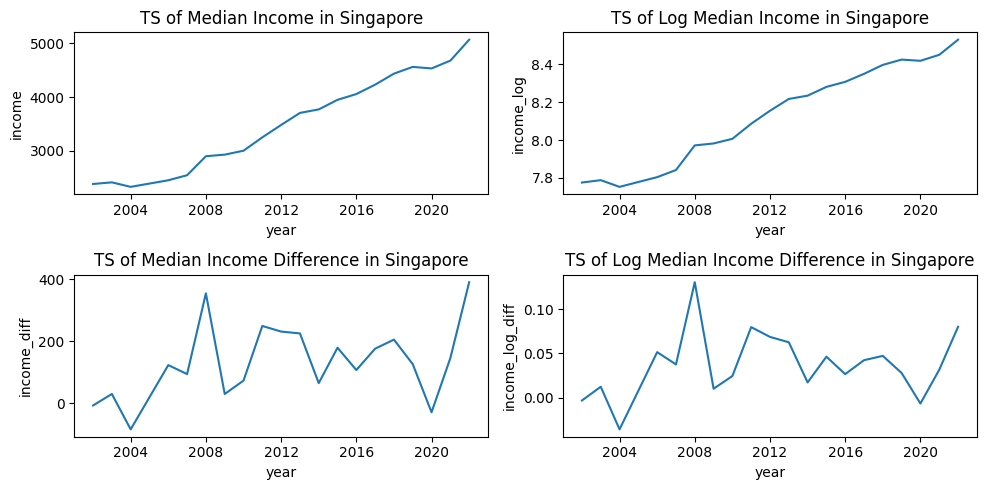

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.lineplot(data=median_income, x="year", y="income", ax=axes[0][0])
axes[0][0].set_title("TS of Median Income in Singapore")

sns.lineplot(data=median_income, x="year", y="income_log", ax=axes[0][1])
axes[0][1].set_title("TS of Log Median Income in Singapore")

sns.lineplot(data=median_income, x="year", y="income_diff", ax=axes[1][0])
axes[1][0].set_title("TS of Median Income Difference in Singapore")

sns.lineplot(data=median_income, x="year", y="income_log_diff", ax=axes[1][1])
axes[1][1].set_title("TS of Log Median Income Difference in Singapore")

plt.tight_layout()
plt.savefig(Path("..") / "asset" / "median_income_ts.png")